###### data taken from 
https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#LeaderBoard

###### This is a binary classification problem where we need to predict whether or not to approve a loan based on the past information of the person.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('ltrain.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [9]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [10]:
#drop missing value

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.shape

(542, 13)

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


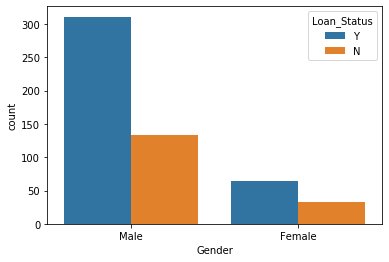

In [14]:
#Comparison between Genders in getting the Loan:
sns.countplot(df['Gender'],hue=df['Loan_Status'])
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


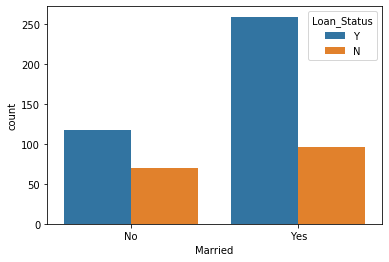

In [15]:
#Comparison between Married Status in getting the Loan:
sns.countplot(df['Married'],hue=df['Loan_Status'])
print(pd.crosstab(df['Married'],df['Loan_Status']))

Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


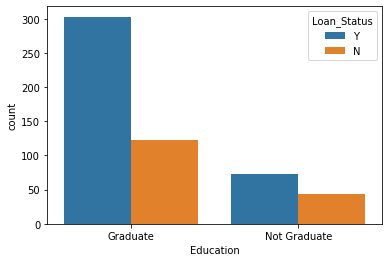

In [16]:
#Comparison between Education Status of an Individual in getting the Loan:
sns.countplot(df['Education'],hue=df['Loan_Status'])
print(pd.crosstab(df['Education'],df['Loan_Status']))

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


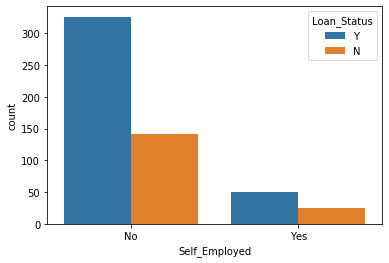

In [17]:
#Comparison between Self-Employed or Not in getting the Loan:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


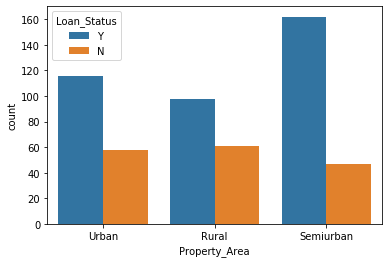

In [18]:
#comparison between Property Area for getting the Loan:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

In [19]:
'''replace the Variable values to Numerical form & display the Value Counts
The data in Numerical form avoids disturbances in building the model.'''

df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [20]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [21]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [22]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [23]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [24]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [25]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [26]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [27]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
53.000000      1
65.000000      1
109.000000     1
156.000000     1
89.000000      1
Name: LoanAmount, Length: 195, dtype: int64

Text(0.5, 1, 'Correlation Matrix (for Loan Status)')

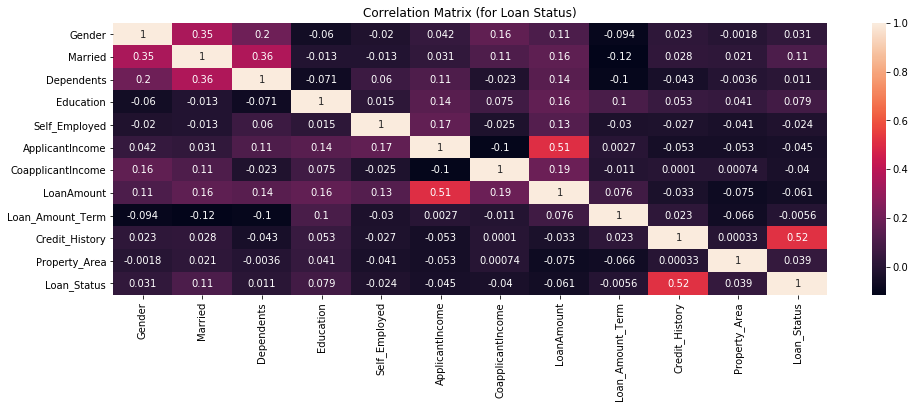

In [28]:
#Display the Correlation Matrix
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [29]:
#Missing values
#here i am just going to use a simple techniques to handle the missing data

df.isnull().sum().sort_values(ascending=False)


Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64

In [35]:
x = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

##### From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [41]:
    
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)


X_train shape (378, 11)
y_train shape (378,)
X_test shape (163, 11)
y_test shape (163,)


In [42]:
# we will use 4 different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

###### we are going to build 3 functions :
'''1) loss : to evaluate our models

precision
recall
f1
log_loss
accuracy_score
2) train_eval_train : to evaluate our models in the same data that we train it on .

3) train_eval_cross : to evaluate our models using different data that we train the model on .

StratifiedKFold
so you may ask why we don't just train our model and evaluate it without building this functions ?
actually you can do that,but mostly your model will not work good at beginning, so you need to change something about your data to improve your accuracy , by changing i mean data processing, and every step you will make, you should evaluate your model to see if it is improving or not, so to not do this step every time, this functions will make life easy as you go :)
'''
`

In [43]:
# loss

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))

In [44]:
# train_eval_train

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X, y)
        loss(y, model.predict(X))
        print('-'*30)
        
train_eval_train(models, X_train, y_train)

# we can see that best model is LogisticRegression at least for now, SVC is just memorizing the data so it is overfitting .


LogisticRegression :


C:\Users\china\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


  pre: 0.802
  rec: 0.981
  f1: 0.883
  loss: 6.396
  acc: 0.815
------------------------------
KNeighborsClassifier :
  pre: 0.783
  rec: 0.900
  f1: 0.837
  loss: 8.589
  acc: 0.751
------------------------------
SVC :
  pre: 1.000
  rec: 1.000
  f1: 1.000
  loss: 0.000
  acc: 1.000
------------------------------
DecisionTreeClassifier :
  pre: 0.800
  rec: 0.981
  f1: 0.881
  loss: 6.488
  acc: 0.812
------------------------------


C:\Users\china\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
